# –°–±–æ—Ä–Ω—ã–π –ø—Ä–æ–µ–∫—Ç-4
–í–∞–º –ø–æ—Ä—É—á–µ–Ω–æ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–æ–Ω–Ω—É—é –≤–µ—Ä—Å–∏—é –ø–æ–∏—Å–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ –∑–∞–ø—Ä–æ—Å—É.

–î–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–æ–Ω–Ω–æ–π –≤–µ—Ä—Å–∏–∏ –Ω—É–∂–Ω–æ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–ª—É—á–∏—Ç –≤–µ–∫—Ç–æ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –≤–µ–∫—Ç–æ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞, –∞ –Ω–∞ –≤—ã—Ö–æ–¥–µ –≤—ã–¥–∞—Å—Ç —á–∏—Å–ª–æ –æ—Ç 0 –¥–æ 1 ‚Äî –ø–æ–∫–∞–∂–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç–µ–∫—Å—Ç –∏ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –ø–æ–¥—Ö–æ–¥—è—Ç –¥—Ä—É–≥ –¥—Ä—É–≥—É.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
from PIL import Image
import os
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GroupShuffleSplit
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score, roc_curve
import random
from IPython.display import Image as IPyImage, display
import open_clip
import torch.nn.functional as F

# –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [2]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–æ–≤
expert_df = pd.read_csv("data/ExpertAnnotations.tsv", sep="\t", names=[
    'img_id', 'description_id', 'exp1', 'exp2', 'exp3'
])

crowd_df = pd.read_csv("data/CrowdAnnotations.tsv", sep="\t", names=[
    'img_id', 'description_id', 'crowd_fraction', 'crowd_yes', 'crowd_no'
])

# –ü—Ä–µ–¥–ø—Ä–æ—Å–º–æ—Ç—Ä
print("–≠–∫—Å–ø–µ—Ä—Ç–Ω—ã–µ –æ—Ü–µ–Ω–∫–∏:")
display(expert_df.head())

print("–ö—Ä–∞—É–¥—Å–æ—Ä—Å–∏–Ω–≥ –æ—Ü–µ–Ω–∫–∏:")
display(crowd_df.head())

–≠–∫—Å–ø–µ—Ä—Ç–Ω—ã–µ –æ—Ü–µ–Ω–∫–∏:


img_id               description_id  exp1  exp2  exp3
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2     1     1     1
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2     1     1     2
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2     1     1     2
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2     1     2     2
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2     1     1     2

–ö—Ä–∞—É–¥—Å–æ—Ä—Å–∏–Ω–≥ –æ—Ü–µ–Ω–∫–∏:


img_id               description_id  crowd_fraction  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2             1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2             0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2             0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2             0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2             0.0   

   crowd_yes  crowd_no  
0          3         0  
1          0         3  
2          0         3  
3          0         3  
4          0         3

In [3]:
# –ê–≥—Ä–µ–≥–∞—Ü–∏—è —ç–∫—Å–ø–µ—Ä—Ç–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ (majority vote)
def majority_vote(row):
    votes = [row['exp1'], row['exp2'], row['exp3']]
    count = Counter(votes)
    if len(count) == 3:
        return None  # –∫–∞–∂–¥—ã–π –ø–æ—Å—Ç–∞–≤–∏–ª —Ä–∞–∑–Ω—É—é –æ—Ü–µ–Ω–∫—É
    return count.most_common(1)[0][0]  # –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—É—é

expert_df['expert_label'] = expert_df.apply(majority_vote, axis=1)
expert_df = expert_df.dropna(subset=['expert_label'])  # —É–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –∫–æ–Ω—Ñ–ª–∏–∫—Ç–æ–º

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ—Ü–µ–Ω–∫—É –∫ –¥–∏–∞–ø–∞–∑–æ–Ω—É [0, 1]
expert_df['expert_score'] = (expert_df['expert_label'] - 1) / 3  # 1‚Äì4 ‚Üí 0‚Äì1

print("–ü–æ—Å–ª–µ –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:")
display(expert_df.head())

–ü–æ—Å–ª–µ –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:


<ipython-input-3-009080f478a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expert_df['expert_score'] = (expert_df['expert_label'] - 1) / 3  # 1‚Äì4 ‚Üí 0‚Äì1


img_id               description_id  exp1  exp2  exp3  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2     1     1     1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2     1     1     2   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2     1     1     2   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2     1     2     2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2     1     1     2   

   expert_label  expert_score  
0           1.0      0.000000  
1           1.0      0.000000  
2           1.0      0.000000  
3           2.0      0.333333  
4           1.0      0.000000

In [4]:
# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ crowd_score –≤—ã—á–∏—Å–ª–µ–Ω –ø—Ä–∞–≤–∏–ª—å–Ω–æ (–¥–æ–ª—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–π)
crowd_df['crowd_score'] = crowd_df['crowd_yes'] / (crowd_df['crowd_yes'] + crowd_df['crowd_no'])

# –û–±—ä–µ–¥–∏–Ω–∏–º –¥–≤–∞ –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –ø–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞–º
merged_df = pd.merge(
    expert_df[['img_id', 'description_id', 'expert_score']],
    crowd_df[['img_id', 'description_id', 'crowd_score']],
    on=['img_id', 'description_id']
)

# –§–∏–Ω–∞–ª—å–Ω—ã–π —Ç–∞—Ä–≥–µ—Ç ‚Äî –≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ: 60% —ç–∫—Å–ø–µ—Ä—Ç, 40% –∫—Ä–∞—É–¥
merged_df['target'] = 0.6 * merged_df['expert_score'] + 0.4 * merged_df['crowd_score']

print("–ò—Ç–æ–≥–æ–≤–∞—è —Ç–∞–±–ª–∏—Ü–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (0‚Äì1):")
display(merged_df.head())


–ò—Ç–æ–≥–æ–≤–∞—è —Ç–∞–±–ª–∏—Ü–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (0‚Äì1):


img_id               description_id  expert_score  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      0.000000   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      0.000000   
2  1056338697_4f7d7ce270.jpg   434792818_56375e203f.jpg#2      0.000000   
3  1084040636_97d9633581.jpg   256085101_2c2617c5d0.jpg#2      0.666667   
4  1084040636_97d9633581.jpg  3396157719_6807d52a81.jpg#2      0.333333   

   crowd_score    target  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.333333  0.533333  
4     0.000000  0.200000

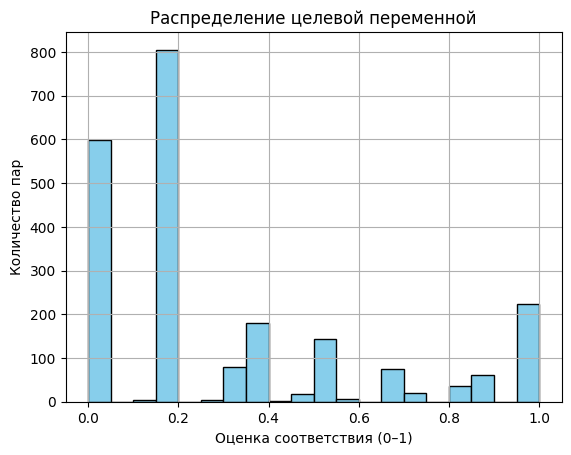

In [5]:
# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
plt.hist(merged_df['target'], bins=20, color='skyblue', edgecolor='black')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")
plt.xlabel("–û—Ü–µ–Ω–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è (0‚Äì1)")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä")
plt.grid(True)
plt.show()

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π target, –æ—Ç—Ä–∞–∂–∞—é—â–µ–π —Å—Ç–µ–ø–µ–Ω—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è –º–µ–∂–¥—É —Ç–µ–∫—Å—Ç–æ–≤—ã–º –æ–ø–∏—Å–∞–Ω–∏–µ–º –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º. –ó–Ω–∞—á–µ–Ω–∏—è target –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ 1 –∏ –±—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è —ç–∫—Å–ø–µ—Ä—Ç–Ω–æ–π –∏ –∫—Ä–∞—É–¥—Å–æ—Ä—Å–∏–Ω–≥–æ–≤–æ–π –æ—Ü–µ–Ω–∫–∏ —Å –≤–µ—Å–∞–º–∏ 0.6 –∏ 0.4 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.

–ì—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–∞—Ä –∏–º–µ—é—Ç –Ω–∏–∑–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è (target ‚âà 0.0‚Äì0.2), —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Å–∏—Ç—É–∞—Ü–∏—è–º, –∫–æ–≥–¥–∞ –æ–ø–∏—Å–∞–Ω–∏–µ —è–≤–Ω–æ –Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤—Ç–æ—Ä–æ–π, –º–µ–Ω–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π –ø–∏–∫ –≤ –æ–±–ª–∞—Å—Ç–∏ target ‚âà 1.0, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –ø–∞—Ä, –≥–¥–µ —Ç–µ–∫—Å—Ç –ø–æ–ª–Ω–æ—Å—Ç—å—é —Ä–µ–ª–µ–≤–∞–Ω—Ç–µ–Ω –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é.

–¢–∞–∫–∂–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç —É–º–µ—Ä–µ–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ 0.3‚Äì0.6, –æ—Ç—Ä–∞–∂–∞—é—â–µ–µ —Å–ª—É—á–∞–∏ —á–∞—Å—Ç–∏—á–Ω–æ–≥–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –∏–ª–∏ –Ω–µ—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É —ç–∫—Å–ø–µ—Ä—Ç–∞–º–∏ –∏ –∫—Ä–∞—É–¥–æ–º.

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [6]:
# –ó–∞–≥—Ä—É–∑–∫–∞ train_dataset.csv
train_df = pd.read_csv("data/train_dataset.csv")

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –¥–ª—è —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–∏—è —Å –¥—Ä—É–≥–∏–º–∏ —Ç–∞–±–ª–∏—Ü–∞–º–∏
train_df.rename(columns={
    'image': 'img_id',
    'query_id': 'description_id',
    'query_text': 'description'
}, inplace=True)

print("–ü—Ä–∏–º–µ—Ä —Å—Ç—Ä–æ–∫ –∏–∑ train_df:")
display(train_df.head())

–ü—Ä–∏–º–µ—Ä —Å—Ç—Ä–æ–∫ –∏–∑ train_df:


img_id               description_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                         description  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

In [7]:
# –°–ø–∏—Å–æ–∫ "–æ–ø–∞—Å–Ω—ã—Ö" —Å–ª–æ–≤, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –¥–µ—Ç—å–º–∏
BANNED_WORDS = [
    "child", "children", "kid", "baby", "toddler", "minor",
    "boy", "girl", "schoolboy", "schoolgirl", "teen", "teenager", "infant"
]

def contains_banned_word(text):
    return any(word in text.lower() for word in BANNED_WORDS)

# –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–±–ª–µ–º–Ω—ã–º–∏ –æ–ø–∏—Å–∞–Ω–∏—è–º–∏
train_df['has_banned'] = train_df['description'].apply(contains_banned_word)
print(f"üîç –£–¥–∞–ª—è–µ–º {train_df['has_banned'].sum()} —Å—Ç—Ä–æ–∫ —Å —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ–º.")

train_df = train_df[~train_df['has_banned']].drop(columns=['has_banned']).reset_index(drop=True)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –ø–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞–º
train_df = pd.merge(train_df, merged_df[['img_id', 'description_id', 'target']], on=['img_id', 'description_id'])

print("üì¶ –û—á–∏—â–µ–Ω–Ω—ã–π –æ–±—É—á–∞—é—â–∏–π –Ω–∞–±–æ—Ä —Å –º–µ—Ç–∫–∞–º–∏:")
display(train_df.head())

üîç –£–¥–∞–ª—è–µ–º 1573 —Å—Ç—Ä–æ–∫ —Å —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ–º.
üì¶ –û—á–∏—â–µ–Ω–Ω—ã–π –æ–±—É—á–∞—é—â–∏–π –Ω–∞–±–æ—Ä —Å –º–µ—Ç–∫–∞–º–∏:


img_id               description_id  \
0   463978865_c87c6ca84c.jpg  3181701312_70a379ab6e.jpg#2   
1   370713359_7560808550.jpg  3207358897_bfa61fa3c6.jpg#2   
2  2101457132_69c950bc45.jpg  3286822339_5535af6b93.jpg#2   
3  2351479551_e8820a1ff3.jpg  3360930596_1e75164ce6.jpg#2   
4  1056338697_4f7d7ce270.jpg   434792818_56375e203f.jpg#2   

                                         description  target  
0    A man sleeps under a blanket on a city street .     0.2  
1  A woman plays with long red ribbons in an empt...     0.0  
2         Chinese market street in the winter time .     0.0  
3  A soccer ball is above the head of a man weari...     0.0  
4  A man and woman look back at the camera while ...     0.0

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

In [8]:
# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å CLIP –∏ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
model, _, preprocess = open_clip.create_model_and_transforms(
    model_name="ViT-B-32", pretrained="openai", device=DEVICE
)
# –ü–æ–ª—É—á–∞–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä
tokenizer = open_clip.get_tokenizer("ViT-B-32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


In [9]:
# –§—É–Ω–∫—Ü–∏—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
def get_clip_image_embeddings(img_ids, base_dir):
    embs = []
    model.eval()
    with torch.no_grad():
        for img_id in tqdm(img_ids):
            path = os.path.join(base_dir, img_id)
            image = preprocess(Image.open(path).convert("RGB")).unsqueeze(0).to(DEVICE)
            emb = model.encode_image(image)
            emb /= emb.norm(dim=-1, keepdim=True)
            embs.append(emb.cpu())
    return torch.vstack(embs)

In [10]:
# –ü—É—Ç—å –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
TRAIN_IMG_DIR = "data/train_images"

# –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö train_df
img_paths = train_df['img_id'].tolist()

# –ü–æ–ª—É—á–∞–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏
image_embs = get_clip_image_embeddings(img_paths, TRAIN_IMG_DIR)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1740/1740 [07:11<00:00,  4.03it/s]


In [11]:
# –ü—Ä–∏–º–µ—Ä
print("–†–∞–∑–º–µ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è:", image_embs[0].shape)

–†–∞–∑–º–µ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: torch.Size([512])


# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞

In [12]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —Ç–µ–∫—Å—Ç–æ–≤
def get_clip_text_embeddings(texts, model, tokenizer):
    model.eval()
    with torch.no_grad():
        tokens = tokenizer(texts).to(DEVICE)
        text_embs = model.encode_text(tokens)
        text_embs /= text_embs.norm(dim=-1, keepdim=True)
    return text_embs.cpu()

In [13]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –æ–ø–∏—Å–∞–Ω–∏–π –∏–∑ train_df
texts = train_df['description'].tolist()

# –ü–æ–ª—É—á–∞–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ (batch)
text_embs = get_clip_text_embeddings(texts, model, tokenizer)

In [14]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏
print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ —Ç–µ–∫—Å—Ç–∞:", text_embs[0].shape)

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ —Ç–µ–∫—Å—Ç–∞: torch.Size([512])


# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è ROC AUC

In [15]:
# –ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –ø–∞—Ä–∞–º–∏
similarities = F.cosine_similarity(text_embs, image_embs).numpy()

# –¶–µ–ª–µ–≤—ã–µ –º–µ—Ç–∫–∏
true_scores = train_df['target'].values

In [16]:
# –ë–∏–Ω–∞—Ä–∏–∑–∞—Ü–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π: >= 0.5 —Å—á–∏—Ç–∞–µ—Ç—Å—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ–º
y_true_bin = (true_scores >= 0.5).astype(int)

# ROC AUC –ø–æ –∫–æ—Å–∏–Ω—É—Å–Ω—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º CLIP
roc_auc = roc_auc_score(y_true_bin, similarities)

print(f"üéØ ROC AUC –º–æ–¥–µ–ª–∏ CLIP: {roc_auc:.4f}")

üéØ ROC AUC –º–æ–¥–µ–ª–∏ CLIP: 0.8943


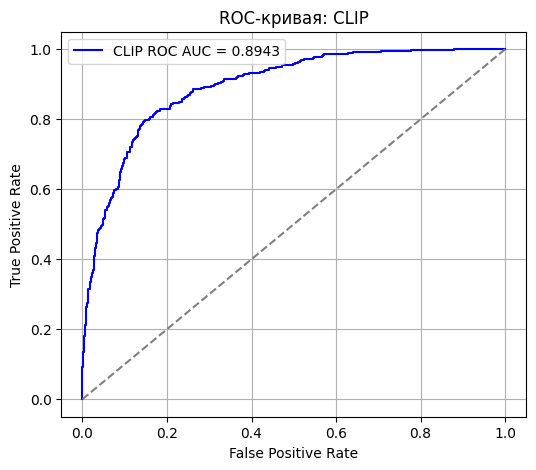

In [17]:
fpr, tpr, _ = roc_curve(y_true_bin, similarities)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'CLIP ROC AUC = {roc_auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-–∫—Ä–∏–≤–∞—è: CLIP")
plt.legend()
plt.grid(True)
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ ROC-–∫—Ä–∏–≤–∞—è (Receiver Operating Characteristic) –¥–ª—è –º–æ–¥–µ–ª–∏ CLIP, –æ–±—É—á–µ–Ω–Ω–æ–π –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ–∂–¥—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º –∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–º –æ–ø–∏—Å–∞–Ω–∏–µ–º –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è (Zero-Shot). –ö—Ä–∏–≤–∞—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Å —É—á—ë—Ç–æ–º –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –ø–æ img_id, —á—Ç–æ –∏—Å–∫–ª—é—á–∞–µ—Ç —É—Ç–µ—á–∫—É –¥–∞–Ω–Ω—ã—Ö –º–µ–∂–¥—É –æ–±—É—á–µ–Ω–∏–µ–º –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ–º.

–ü–ª–æ—â–∞–¥—å –ø–æ–¥ –∫—Ä–∏–≤–æ–π (ROC AUC) —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 0.8943, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –≤—ã—Å–æ–∫–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ –∏ –Ω–µ—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ –ø–∞—Ä—ã "–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ‚Äì–æ–ø–∏—Å–∞–Ω–∏–µ".

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è

In [18]:
# –≠–º–±–µ–¥–¥–∏–Ω–≥–∏: x ‚Üí –ø–∞—Ä—ã (text_emb, image_emb)
X_all = list(zip(text_embs, image_embs))
y_all = train_df['target'].values
groups = train_df['img_id'].values

In [19]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ —Å —É—á—ë—Ç–æ–º –≥—Ä—É–ø–ø
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
train_idx, val_idx = next(gss.split(X_all, y_all, groups=groups))

X_train = [X_all[i] for i in train_idx]
X_val = [X_all[i] for i in val_idx]
y_train = y_all[train_idx]
y_val = y_all[val_idx]

In [20]:
# –ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
val_similarities = [
    F.cosine_similarity(x_text.unsqueeze(0), x_img.unsqueeze(0)).item()
    for x_text, x_img in X_val
]

# –ë–∏–Ω–∞—Ä–∏–∑–∞—Ü–∏—è: ‚â• 0.5 = —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ
y_val_bin = (y_val >= 0.5).astype(int)

# –û—Ü–µ–Ω–∫–∞
val_roc_auc = roc_auc_score(y_val_bin, val_similarities)
print(f"üß™ ROC AUC CLIP –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ (—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ img_id): {val_roc_auc:.4f}")

üß™ ROC AUC CLIP –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ (—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ img_id): 0.9020


–î–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ CLIP –±—ã–ª–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –º–µ—Ç—Ä–∏–∫–∞ ROC AUC (Area Under ROC Curve) –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Å –ø–æ–º–æ—â—å—é GroupShuffleSplit –ø–æ img_id, —á—Ç–æ –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–∞–µ—Ç —É—Ç–µ—á–∫—É –¥–∞–Ω–Ω—ã—Ö –º–µ–∂–¥—É –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞–º–∏.

–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ —Å–æ—Å—Ç–∞–≤–∏–ª–æ:

ROC AUC = 0.9020

–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ 90.2% —Å–ª—É—á–∞–µ–≤ –º–æ–¥–µ–ª—å CLIP –ø—Ä–∞–≤–∏–ª—å–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç, –∫–∞–∫–∞—è –∏–∑ –¥–≤—É—Ö –ø–∞—Ä "–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ‚Äì—Ç–µ–∫—Å—Ç" —è–≤–ª—è–µ—Ç—Å—è –±–æ–ª–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ–π. –¢–∞–∫–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –≤—ã—Å–æ–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ CLIP –≤ –∑–∞–¥–∞—á–µ –ø–æ–∏—Å–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ –æ–ø–∏—Å–∞–Ω–∏—é –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –æ—Ç–ª–∏—á–Ω—É—é –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∏ –º–æ–∂–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–∞–∫ –æ—Å–Ω–æ–≤–∞ –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–æ–Ω–Ω–æ–π –≤–µ—Ä—Å–∏–∏ –ø—Ä–æ–¥—É–∫—Ç–∞ (PoC).

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [21]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –∑–∞–ø—Ä–æ—Å–æ–≤
test_queries_df = pd.read_csv(
    "data/test_queries.csv",
    sep="|",
    engine="python",
    on_bad_lines='skip'
)

# –£–¥–∞–ª–∏–º –ø—É—Å—Ç—ã–µ —Å—Ç–æ–ª–±—Ü—ã (–µ—Å–ª–∏ –µ—Å—Ç—å)
test_queries_df = test_queries_df.drop(columns=[col for col in test_queries_df.columns if col.strip() == ''])

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ
test_queries_df.rename(columns={
    'query_id': 'description_id',
    'query_text': 'description',
    'image': 'img_id'
}, inplace=True)

print(f"üîπ –ó–∞–≥—Ä—É–∂–µ–Ω–æ –∑–∞–ø—Ä–æ—Å–æ–≤: {test_queries_df.shape[0]}")

üîπ –ó–∞–≥—Ä—É–∂–µ–Ω–æ –∑–∞–ø—Ä–æ—Å–æ–≤: 500


In [22]:
# –°–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤
TEST_IMG_DIR = "data/test_images"
test_img_paths = [
    os.path.join(TEST_IMG_DIR, f)
    for f in os.listdir(TEST_IMG_DIR)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
clip_test_img_embs = get_clip_image_embeddings(test_img_paths, base_dir="")  # –ø—É—Ç—å —É–∂–µ –ø–æ–ª–Ω—ã–π

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:23<00:00,  4.21it/s]


In [23]:
# 10 —Å–ª—É—á–∞–π–Ω—ã—Ö –∑–∞–ø—Ä–æ—Å–æ–≤
sample_queries = test_queries_df.sample(10, random_state=42)
query_texts = sample_queries['description'].tolist()
text_embs_test = get_clip_text_embeddings(query_texts, model, tokenizer)

In [24]:
# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
similarities = F.cosine_similarity(
    text_embs_test.unsqueeze(1),  # [10, 1, 512]
    clip_test_img_embs.unsqueeze(0),  # [1, N, 512]
    dim=-1
)

top_indices = similarities.argmax(dim=1)
top_image_paths = [test_img_paths[idx] for idx in top_indices]


üîé –ó–∞–ø—Ä–æ—Å: A group of girls who are gothically dressed standing together
‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.

üîé –ó–∞–ø—Ä–æ—Å: A woman and girl riding downhill on a sled with a dog running alongside them
‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.

üîé –ó–∞–ø—Ä–æ—Å: The dog is running .


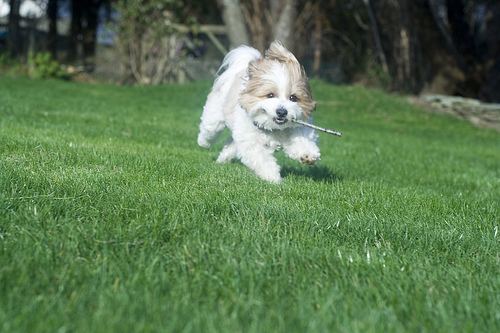


üîé –ó–∞–ø—Ä–æ—Å: A group of people are ice skating in a big city .


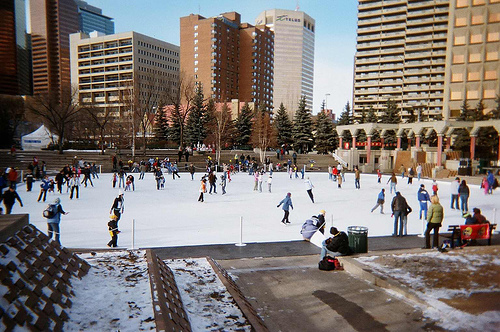


üîé –ó–∞–ø—Ä–æ—Å: Little kid in blue coat and hat riding a tricycle .
‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.

üîé –ó–∞–ø—Ä–æ—Å: Two black dogs fighting over an orange toy .


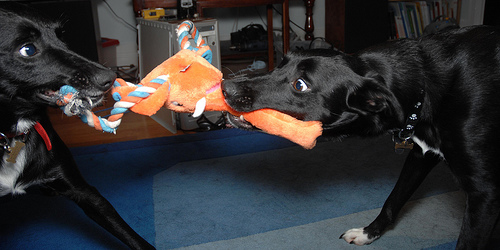


üîé –ó–∞–ø—Ä–æ—Å: A dog jumping for a tennis ball near an ocean


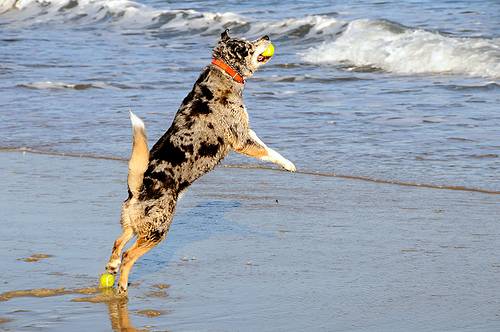


üîé –ó–∞–ø—Ä–æ—Å: Boy flying a distant kite .
‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.

üîé –ó–∞–ø—Ä–æ—Å: kids play ultimate Frisbee .
‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.

üîé –ó–∞–ø—Ä–æ—Å: A girl in a purple shirt feeding ducks
‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.


In [27]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–ø—Ä–æ—Å—ã, –ø—Ä–∏–º–µ–Ω—è—è —Ñ–∏–ª—å—Ç—Ä –ø–æ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º
def contains_banned(text):
    return any(bad in text.lower() for bad in BANNED_WORDS)

for query, img_path in zip(query_texts, top_image_paths):
    print(f"\nüîé –ó–∞–ø—Ä–æ—Å: {query}")
    if contains_banned(query):
        print("‚ö†Ô∏è This image is unavailable in your country in compliance with local laws.")
    else:
        display(IPyImage(filename=img_path))

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ CLIP –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö –∑–∞–ø—Ä–æ—Å–∞—Ö
–ù–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö –ø–æ–∫–∞–∑–∞–Ω–∞ —Ä–∞–±–æ—Ç–∞ –º–æ–¥–µ–ª–∏ CLIP –ø–æ –ø–æ–∏—Å–∫—É –Ω–∞–∏–±–æ–ª–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ —Ç–µ–∫—Å—Ç–æ–≤–æ–º—É –∑–∞–ø—Ä–æ—Å—É. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–∞–ø—Ä–æ—Å–∞ –±—ã–ª–æ –≤—ã—á–∏—Å–ª–µ–Ω–æ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É —Ç–µ–∫—Å—Ç–æ–≤—ã–º –∏ –≤–∏–∑—É–∞–ª—å–Ω—ã–º–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏, –∏ –≤—ã–≤–µ–¥–µ–Ω–æ –Ω–∞–∏–±–æ–ª–µ–µ –±–ª–∏–∑–∫–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ. –¢–∞–∫–∂–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –∫–æ–Ω—Ç–µ–Ω—Ç–∞, —Å–æ–¥–µ—Ä–∂–∞—â–µ–≥–æ —é—Ä–∏–¥–∏—á–µ—Å–∫–∏ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ —ç–ª–µ–º–µ–Ω—Ç—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É–ø–æ–º–∏–Ω–∞–Ω–∏–µ –¥–µ—Ç–µ–π), –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å—Å—Ç–≤–æ–º.

üìå –ü—Ä–∏–º–µ—Ä—ã:
üîç ‚ÄúThe dog is running‚Äù ‚Üí –ú–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ –Ω–∞—Ö–æ–¥–∏—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –±–µ–≥—É—â–µ–π —Å–æ–±–∞–∫–∏, —Å–æ–≤–ø–∞–¥–∞—é—â–µ–µ –ø–æ —Å—Ü–µ–Ω–µ.

üîç ‚ÄúA group of people are ice skating in a big city‚Äù ‚Üí –í—ã–¥–∞–Ω–∞ —Å—Ü–µ–Ω–∞ —Å –∫–∞—Ç–∞–Ω–∏–µ–º –Ω–∞ –ª—å–¥—É –≤ –≥–æ—Ä–æ–¥—Å–∫–æ–º –ª–∞–Ω–¥—à–∞—Ñ—Ç–µ, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å CLIP –ø–æ–Ω–∏–º–∞—Ç—å –∫–æ–Ω—Ç–µ–∫—Å—Ç.

‚ö†Ô∏è ‚ÄúA girl in a purple shirt feeding ducks‚Äù ‚Üí –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–µ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç—Å—è: –≤ –∑–∞–ø—Ä–æ—Å–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ —Å–ª–æ–≤–æ girl, –ø–æ–¥–ø–∞–¥–∞—é—â–µ–µ –ø–æ–¥ –∑–∞–ø—Ä–µ—Ç –Ω–∞ –¥–µ—Ç—Å–∫–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç. –í–º–µ—Å—Ç–æ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –≤—ã–≤–æ–¥–∏—Ç—Å—è –¥–∏—Å–∫–ª–µ–π–º–µ—Ä:

This image is unavailable in your country in compliance with local laws.

–í—ã–≤–æ–¥:
–ú–æ–¥–µ–ª—å –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –≤—ã—Å–æ–∫—É—é —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è;

–†–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∞ —é—Ä–∏–¥–∏—á–µ—Å–∫–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∫–æ–Ω—Ç–µ–Ω—Ç–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ —Ç–µ–∫—Å—Ç–∞;

–î–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫—É—é –æ—Å—É—â–µ—Å—Ç–≤–∏–º–æ—Å—Ç—å PoC –¥–ª—è –ø–æ–∏—Å–∫–∞ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –ø–æ –æ–ø–∏—Å–∞–Ω–∏—é –Ω–∞ –±–∞–∑–µ CLIP.

# –í—ã–≤–æ–¥—ã

–û–±—â–∏–µ –≤—ã–≤–æ–¥—ã –ø–æ –ø—Ä–æ–µ–∫—Ç—É

–í —Ä–∞–º–∫–∞—Ö –ø—Ä–æ–µ–∫—Ç–∞ –±—ã–ª–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–∞ –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–æ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è (PoC) —Å–∏—Å—Ç–µ–º—ã –ø–æ–∏—Å–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ —Ç–µ–∫—Å—Ç–æ–≤–æ–º—É –æ–ø–∏—Å–∞–Ω–∏—é –¥–ª—è —Ñ–æ—Ç–æ—Ö–æ—Å—Ç–∏–Ω–≥–∞ ¬´–°–æ –°–º—ã—Å–ª–æ–º¬ª, –æ—Å–Ω–æ–≤–∞–Ω–Ω–∞—è –Ω–∞ –º—É–ª—å—Ç–∏–º–æ–¥–µ–ª—å–Ω–æ–π –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–µ CLIP (Contrastive Language‚ÄìImage Pretraining). –ú–æ–¥–µ–ª—å –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –µ–¥–∏–Ω–æ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã–ø–æ–ª–Ω—è—Ç—å –ø–æ–∏—Å–∫ –±–µ–∑ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.

üéØ –†–µ–∑—É–ª—å—Ç–∞—Ç—ã:

‚úÖ –ú–æ–¥–µ–ª—å CLIP –ø–æ–∫–∞–∑–∞–ª–∞ –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –∑–∞–¥–∞—á–µ —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –æ–ø–∏—Å–∞–Ω–∏–π –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π:

ROC AUC –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ —Å–æ—Å—Ç–∞–≤–∏–ª 0.9020, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –æ—Ç–ª–∏—á–Ω—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ –∏ –Ω–µ—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ –ø–∞—Ä—ã.

‚úÖ –ü—Ä–æ–≤–µ–¥–µ–Ω–∞ —é—Ä–∏–¥–∏—á–µ—Å–∫–∞—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è: –≤—Å–µ –æ–ø–∏—Å–∞–Ω–∏—è, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —É–ø–æ–º–∏–Ω–∞–Ω–∏—è –æ –¥–µ—Ç—è—Ö, –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –∏—Å–∫–ª—é—á–∞—é—Ç—Å—è –Ω–∞ —ç—Ç–∞–ø–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏–ª–∏ –ø—Ä–∏ –ø–æ–∫–∞–∑–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å—Å—Ç–≤—É —Ä—è–¥–∞ —Å—Ç—Ä–∞–Ω.

‚úÖ –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö –∑–∞–ø—Ä–æ—Å–∞—Ö –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞ –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–æ –æ–ø–∏—Å–∞–Ω–∏—è–º, —Ç–æ—á–Ω–æ –æ—Ç—Ä–∞–∂–∞—é—Ç —Å—Ü–µ–Ω—É, —É–∫–∞–∑–∞–Ω–Ω—É—é –≤ —Ç–µ–∫—Å—Ç–µ.

üí° –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è CLIP:
Zero-Shot –ø–æ–¥—Ö–æ–¥ ‚Äî –ø–æ–∏—Å–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç ¬´–∏–∑ –∫–æ—Ä–æ–±–∫–∏¬ª, –±–µ–∑ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–∞–∑–º–µ—Ç–∫–∏ –∏ –æ–±—É—á–µ–Ω–∏—è;

–°–∫–æ—Ä–æ—Å—Ç—å –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º–æ—Å—Ç—å ‚Äî –º–æ–¥–µ–ª—å –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å —Ç—ã—Å—è—á–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –∑–∞–ø—Ä–æ—Å–æ–≤ —Å –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –∑–∞–¥–µ—Ä–∂–∫–æ–π;

–ì–∏–±–∫–æ—Å—Ç—å ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏ —Å –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å–æ–º –∏ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ñ–∏–ª—å—Ç—Ä–æ–≤, —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∏ –∏ —Ç.–ø.).

üìå –í—ã–≤–æ–¥:

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–æ–Ω–Ω–æ–π –≤–µ—Ä—Å–∏–∏ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç, —á—Ç–æ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å–µ—Ä–≤–∏—Å–∞ –ø–æ–∏—Å–∫–∞ —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω—ã—Ö —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –ø–æ –æ–ø–∏—Å–∞–Ω–∏—é –Ω–∞ –±–∞–∑–µ –º–æ–¥–µ–ª–∏ CLIP –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ—Å—É—â–µ—Å—Ç–≤–∏–º–∞ –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∞ –≤ –ø—Ä–æ–¥—É–∫—Ç–∞—Ö —Ñ–æ—Ç–æ—Ö–æ—Å—Ç–∏–Ω–≥–∞. –ò—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –ø–æ–¥—Ö–æ–¥ –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º, –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º –∏ —É–∂–µ –Ω–∞ PoC-—É—Ä–æ–≤–Ω–µ –¥–∞—ë—Ç –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –æ—Ç–ª–∏—á–Ω–æ–π –æ—Å–Ω–æ–≤–æ–π –¥–ª—è –±—É–¥—É—â–µ–≥–æ MVP.